In [ ]:
from skimage import data 
camera = data.camera()
type(camera)

from skimage import data,io
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [37]:
img = Image.open('test.jpg').convert('L')
img.thumbnail((1000,1000))
im = np.array(img)
im = np.uint8(im ^ 500)
im = Image.fromarray(im)
data = im[500,:]
# plt.imshow(im,vmin = 220, vmax = 232)
plt.plot(data)
plt.show()


TypeError: 'Image' object has no attribute '__getitem__'

In [ ]:
#color seperation
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

#artificual RGB
cmap_hema = LinearSegmentedColormap.from_list('mycmap',['white','navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])
ihc_rgb = img
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

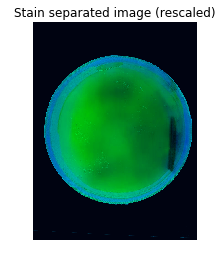

In [49]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()

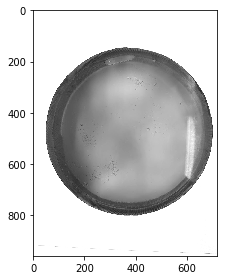

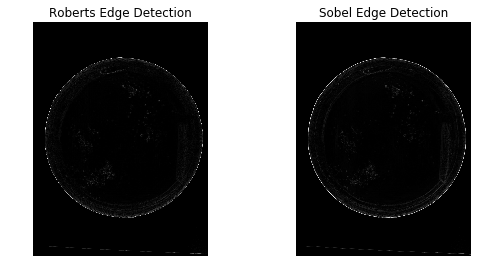

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray
from skimage import io

image2 = io.imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)







image = io.imread('tea.jpg',as_grey=False,flatten = None)
image = rgb2gray(image)
io.imshow(image)
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')



for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

C:\Users\Isamu Naets\Anaconda2\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


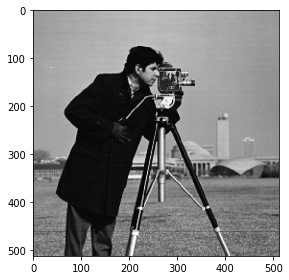

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.data import camera


image = camera()
io.imshow(image)